<a href="https://colab.research.google.com/github/abhaysrivastav/Pytorch/blob/master/Linear_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.nn import Linear


In [2]:
torch.manual_seed(1)
model =  Linear(in_features=1 , out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [3]:
x = torch.tensor([[2.0], [3.0]])
print(model(x))

tensor([[0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)


**Custom Linear Models**

---



---



In [0]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


Text(0, 0.5, 'y')

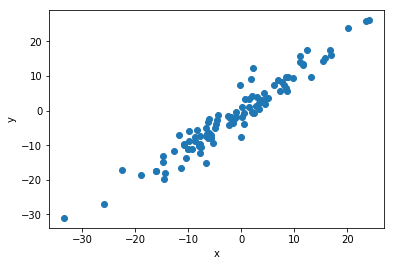

In [48]:
X = torch.randn(100, 1)*10
Y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), Y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred =  self.linear(x)
    return pred 


In [51]:
torch.manual_seed(1)
model1 =  LR(1, 1)
#print(list(model1.parameters()))
print(model1)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
#x = torch.tensor([[1.0], [2.0]])
#print(model1.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [0]:
[w, b] = model1.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, Y)
  plt.show()

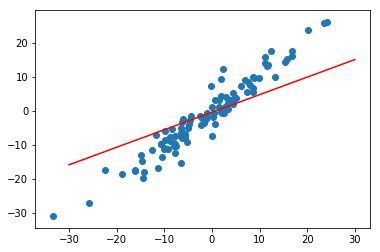

In [54]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr = 0.01)

In [61]:
epochs = 50
losses = []
for i in range(epochs):
  y_pred = model1.forward(X)
  loss = criterion(y_pred, Y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 1.383394003667467e+22
epoch: 1 loss: 1.7555921934316506e+22
epoch: 2 loss: 2.2279278083204266e+22
epoch: 3 loss: 2.827343633104539e+22
epoch: 4 loss: 3.588031108744975e+22
epoch: 5 loss: 4.553381516931524e+22
epoch: 6 loss: 5.778453389728623e+22
epoch: 7 loss: 7.333126155214421e+22
epoch: 8 loss: 9.306077041131733e+22
epoch: 9 loss: 1.1809852353248435e+23
epoch: 10 loss: 1.4987251778189228e+23
epoch: 11 loss: 1.9019519080077935e+23
epoch: 12 loss: 2.413665849620392e+23
epoch: 13 loss: 3.063053390689826e+23
epoch: 14 loss: 3.887157719015128e+23
epoch: 15 loss: 4.9329886685146874e+23
epoch: 16 loss: 6.260184346606025e+23
epoch: 17 loss: 7.944463593680135e+23
epoch: 18 loss: 1.0081896476412145e+24
epoch: 19 loss: 1.2794393635275124e+24
epoch: 20 loss: 1.6236668489276025e+24
epoch: 21 loss: 2.060508951138325e+24
epoch: 22 loss: 2.61488131268055e+24
epoch: 23 loss: 3.3184064086978226e+24
epoch: 24 loss: 4.2112089339694104e+24
epoch: 25 loss: 5.34422524879922e+24
epoch: 26 los

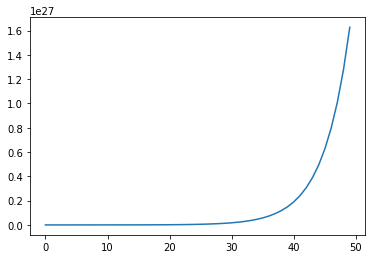

In [62]:
plt.plot(range(epochs), losses)

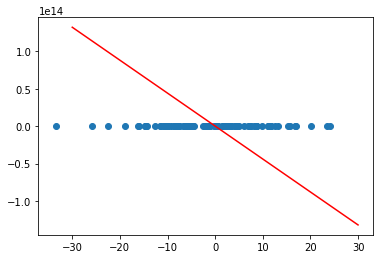

In [63]:
plot_fit("Training Model")